<a href="https://colab.research.google.com/github/hurkyduke/aes/blob/main/aec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

iris = load_iris()
X = iris.data
y = iris.target.reshape(-1,1)
encoder = OneHotEncoder()
y = encoder.fit_transform(y).toarray()

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
model = Sequential()

model.add(Dense(10,input_shape = (X_train.shape[1],),activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(y.shape[1],activation='softmax'))

model.compile(optimizer='adam',loss = 'categorical_crossentropy',metrics=['accuracy'])

model.fit(X_train,y_train,epochs = 2,batch_size=5,verbose=1)
loss,accuracy=model.evaluate(X_test,y_test)
print(f"Accuracy",{accuracy})




Epoch 1/2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3846 - loss: 1.1092
Epoch 2/2
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3919 - loss: 1.0576  
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step - accuracy: 0.6333 - loss: 1.0434
Accuracy {0.6333333253860474}


In [4]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Load the IMDB dataset
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)

# Preprocess the data: pad sequences to ensure uniform length
X_train = pad_sequences(X_train, maxlen=200)
X_test = pad_sequences(X_test, maxlen=200)

# Build a simple LSTM-based neural network
model = Sequential([
    Embedding(input_dim=10000, output_dim=32, input_length=200),
    LSTM(64),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy}')


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


313/313 ━━━━━━━━━━━━━━━━━━━━ 49s 149ms/step - accuracy: 0.6781 - loss: 0.5632 - val_accuracy: 0.8682 - val_loss: 0.3236
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 89s 172ms/step - accuracy: 0.9040 - loss: 0.2479 - val_accuracy: 0.8644 - val_loss: 0.3142
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 71s 138ms/step - accuracy: 0.9324 - loss: 0.1905 - val_accuracy: 0.8706 - val_loss: 0.3656
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 43s 138ms/step - accuracy: 0.9488 - loss: 0.1451 - val_accuracy: 0.8620 - val_loss: 0.3723
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 43s 138ms/step - accuracy: 0.9584 - loss: 0.1185 - val_accuracy: 0.8644 - val_loss: 0.3712
782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - accuracy: 0.8579 - loss: 0.3979
Accuracy: 0.8550000190734863


2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
550378/550378 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.3743 - loss: 3.1780 - val_accuracy: 0.5910 - val_loss: 1.8410
Epoch 2/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.6615 - loss: 1.6235 - val_accuracy: 0.6940 - val_loss: 1.3963
Epoch 3/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.7397 - loss: 1.2054 - val_accuracy: 0.7400 - val_loss: 1.2264
Epoch 4/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.7857 - loss: 1.0068 - val_accuracy: 0.7630 - val_loss: 1.1078
Epoch 5/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.8238 - loss: 0.8141 - val_accuracy: 0.7800 - val_loss: 1.0310
Epoch 6/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step - accuracy: 0.8556 - loss: 0.6964 - val_accuracy: 0.7930 - val_loss: 0.9775
Epoch 7/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - accuracy: 0.8876 - loss: 0.5527 - val_accuracy: 0.8070 - val_loss: 0.9253
Epoch 8/15
16/1

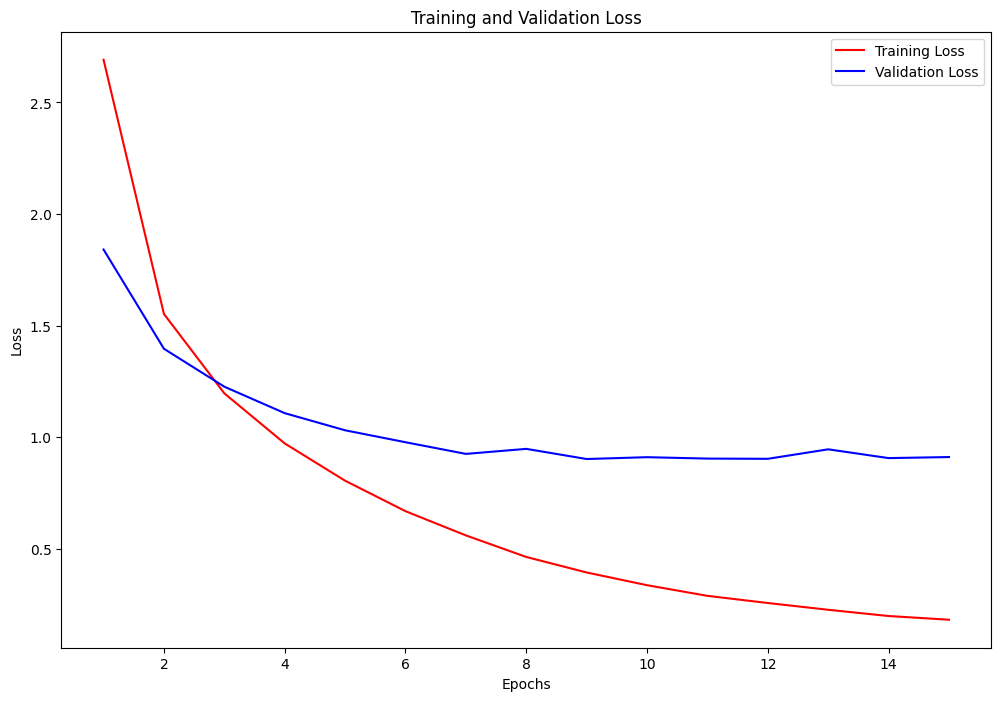

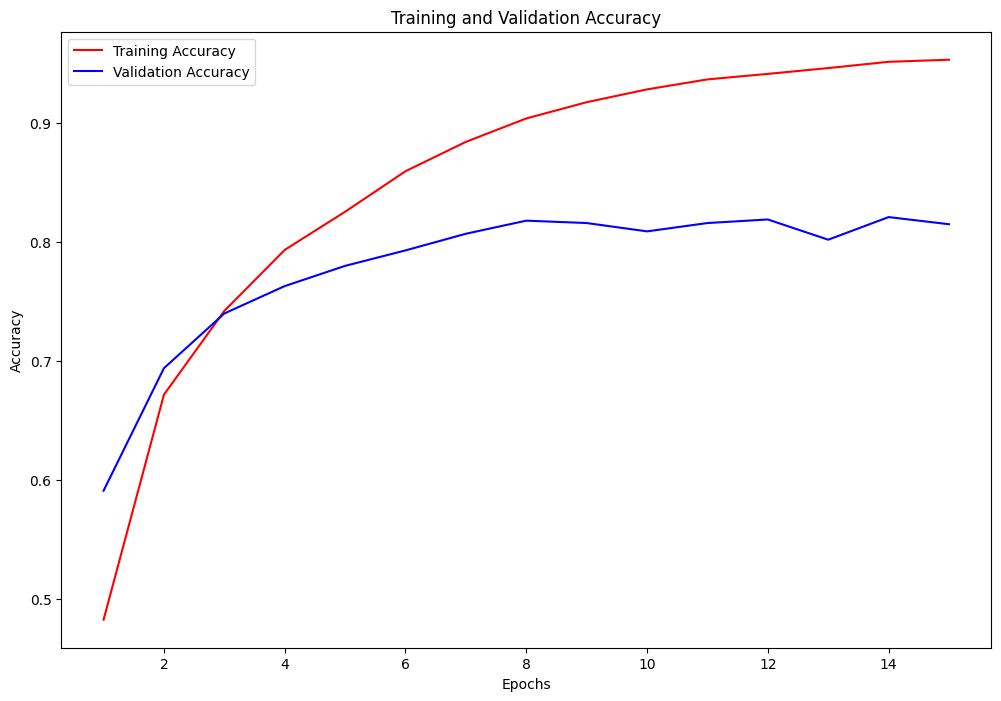

In [5]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.datasets import reuters
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load the Reuters dataset
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

# Decode a sample newswire (optional)
word_index = reuters.get_word_index()
reverse_word_index = {value: key for key, value in word_index.items()}
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

# Vectorize the data
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

# One-hot encode the labels
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

# Build the model
model = tf.keras.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(46, activation='softmax')
])

# Compile the model
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Split validation data
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

# Train the model
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=5,  # Reduced epochs
                    batch_size=512,
                    validation_data=(x_val, y_val))

# Evaluate the model
results = model.evaluate(x_test, one_hot_test_labels)
print(f"Test Loss: {results[0]}, Test Accuracy: {results[1]}")

# Plot training history
history_dict = history.history
epochs = range(1, len(history_dict['loss']) + 1)

plt.figure(figsize=(12, 8))
plt.plot(epochs, history_dict['loss'], 'r', label='Training Loss')
plt.plot(epochs, history_dict['val_loss'], 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(12, 8))
plt.plot(epochs, history_dict['accuracy'], 'r', label='Training Accuracy')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [6]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# Preprocess the data
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)
# Build the CNN model
model = Sequential([
Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
MaxPooling2D(pool_size=(2, 2)),
Conv2D(64, kernel_size=(3, 3), activation='relu'),
MaxPooling2D(pool_size=(2, 2)),
Flatten(),
Dense(128, activation='relu'),
Dense(10, activation='softmax')
])
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Train the model
model.fit(X_train, y_train, epochs=2, batch_size=32, validation_split=0.2)
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy}')

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/2
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 47s 30ms/step - accuracy: 0.8961 - loss: 0.3340 - val_accuracy: 0.9789 - val_loss: 0.0691
Epoch 2/2
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 47s 32ms/step - accuracy: 0.9839 - loss: 0.0506 - val_accuracy: 0.9859 - val_loss: 0.0489
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9828 - loss: 0.0520
Accuracy: 0.986299991607666


In [4]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt

# Load dataset
dataset_name = 'cats_vs_dogs'
(data_train, data_test), dataset_info = tfds.load(
    dataset_name,
    split=['train[:80%]', 'train[80%:]'],
    as_supervised=True,  # Include labels
    with_info=True        # Include dataset info
)

# Data preprocessing
IMG_SIZE = 150

def preprocess_image(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    image = image / 255.0  # Normalize pixel values
    return image, label

train_dataset = data_train.map(preprocess_image).shuffle(1000).batch(32).prefetch(1)
test_dataset = data_test.map(preprocess_image).batch(32).prefetch(1)

# Visualize a few samples
def plot_samples(dataset, n_samples=5):
    plt.figure(figsize=(12, 8))
    for i, (image, label) in enumerate(dataset.take(n_samples)):
        ax = plt.subplot(1, n_samples, i + 1)
        plt.imshow(image.numpy())
        plt.title('Cat' if label.numpy() == 0 else 'Dog')
        plt.axis('off')
    plt.show()  # Show plot after the loop

plot_samples(data_train.map(preprocess_image))

# Build CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_dataset,
    validation_data=test_dataset,
    epochs=10
)

# Evaluate the model
loss, accuracy = model.evaluate(test_dataset)
print(f"Test Accuracy: {accuracy:.2f}")

# Plot training history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

# Plot Accuracy
plt.figure(figsize=(12, 8))
plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plot Loss
plt.figure(figsize=(12, 8))
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

KeyboardInterrupt: 

In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.datasets import imdb
# Load the IMDb dataset
vocab_size = 10000
max_length = 100
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=vocab_size)
# Preprocess the data: Pad sequences to ensure uniform input size
train_padded = pad_sequences(train_data, maxlen=max_length, padding='post', truncating='post')
test_padded = pad_sequences(test_data, maxlen=max_length, padding='post', truncating='post')
# Build the RNN model
model = Sequential([
Embedding(input_dim=vocab_size, output_dim=32, input_length=max_length), # Embeddinglayer
LSTM(64), # LSTM layer with 64 units
Dropout(0.5), # Dropout for regularization
Dense(1, activation='sigmoid') # Output layer for binary classification
])
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Train the model
model.fit(train_padded, train_labels, epochs=2, validation_data=(test_padded, test_labels))

Epoch 1/2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


782/782 ━━━━━━━━━━━━━━━━━━━━ 59s 73ms/step - accuracy: 0.6245 - loss: 0.6244 - val_accuracy: 0.7992 - val_loss: 0.4508
Epoch 2/2
782/782 ━━━━━━━━━━━━━━━━━━━━ 59s 76ms/step - accuracy: 0.8417 - loss: 0.3927 - val_accuracy: 0.6000 - val_loss: 0.7101
